### HOW TO USE THE FRAMEWORK

Import relevant moduls

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from example import mnist_downloader
np.set_printoptions(precision=4, suppress=True, floatmode="maxprec")


from framework import pca, optimizer, scaler

# make sure that you don't accidently add the download folder
# to your git (it *should* already be in the .gitignore)
download_folder = "./mnist/"
mnist_downloader.download_and_unzip(download_folder)

mnist\train-images-idx3-ubyte.gz already exists, skipping ...
mnist\train-images-idx3-ubyte already exists, skipping ... 
mnist\train-labels-idx1-ubyte.gz already exists, skipping ...
mnist\train-labels-idx1-ubyte already exists, skipping ... 
mnist\t10k-images-idx3-ubyte.gz already exists, skipping ...
mnist\t10k-images-idx3-ubyte already exists, skipping ... 
mnist\t10k-labels-idx1-ubyte.gz already exists, skipping ...
mnist\t10k-labels-idx1-ubyte already exists, skipping ... 


We import the MNIST Dataset

In [2]:
from mnist import MNIST

mndata = MNIST('mnist', return_type="numpy")

images_train, labels_train = mndata.load_training()
images_validation, labels_validation = mndata.load_testing()

Scaling of features with standardization by selecting Class "StandardScaler" from module "scaler"

In [3]:
my_scaler = scaler.StandardScaler()
my_scaler.fit(images_train)
x_scaled = my_scaler.transform(images_train)

#### Principle Component Analysis
Factorizing the scaled features using the Principle Component Analysis leads to a smaller number of components given into the network later on and therewith a smaller and faster network. 
By adjusting the percentage of variance the components have to explain, we set the number of components.

In [4]:
explained_variance = 0.99

In [5]:
pcs, vectors = pca.pcatraining(x_scaled, explained_variance)

#### The Network

With the MNIST_DICTIONARY we are setting the labels for the multiclass classification in order to be able to interpret the output of the network later on. In this case, an output of 0 means the network detected an image containing the number zero and so on.

In [6]:
MNIST_DICTIONARY ={0:0,
                   1:1,
                   2:2,
                   3:3,
                   4:4,
                   5:5,
                   6:6,
                   7:7,
                   8:8,
                   9:9
                   }

We set the architecture for the network to one layer containing 20 neurons. This is done by inizializing an array in which the size represents the number of layers and each position represents the amount of neurons. 

In [7]:
architecture = [20]

To instantiate the network, you have to specify the desired activation function (here "sigmoid"), the desired error function (here "CrossEntropy") and the regularization (here 0) in addition to the parameters just initialized (Principle Components, Classification Dictionary and architecture)

In [8]:
network = optimizer.NeuralNetwork(pcs, MNIST_DICTIONARY, "sigmoid", "CrossEntropy", architecture, 0)

To finally train our network we now need to define the learning rate alpha, the iterations and the labels fitting our images 

In [9]:
alpha = 0.1
y = labels_train
iterations = 600

The error for the trainings set is: (0.03258955686017244-3.563038461956632e-19j) /n the accuracy is: 0.7919333333333334
The mean F1 Score is: 0.7870251331671775
F1 Score for  0  :  0.8962381149235221
____________
F1 Score for  1  :  0.9169502570414887
____________
F1 Score for  2  :  0.7576779998269747
____________
F1 Score for  3  :  0.7692307692307693
____________
F1 Score for  4  :  0.7395930875968332
____________
F1 Score for  5  :  0.6672594348942896
____________
F1 Score for  6  :  0.8715844752605235
____________
F1 Score for  7  :  0.83030112923463
____________
F1 Score for  8  :  0.7262252946911283
____________
F1 Score for  9  :  0.6951907689716164
____________


c:\users\s390638\.virtualenvs\o2_mlpackage-n1lsfocu\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


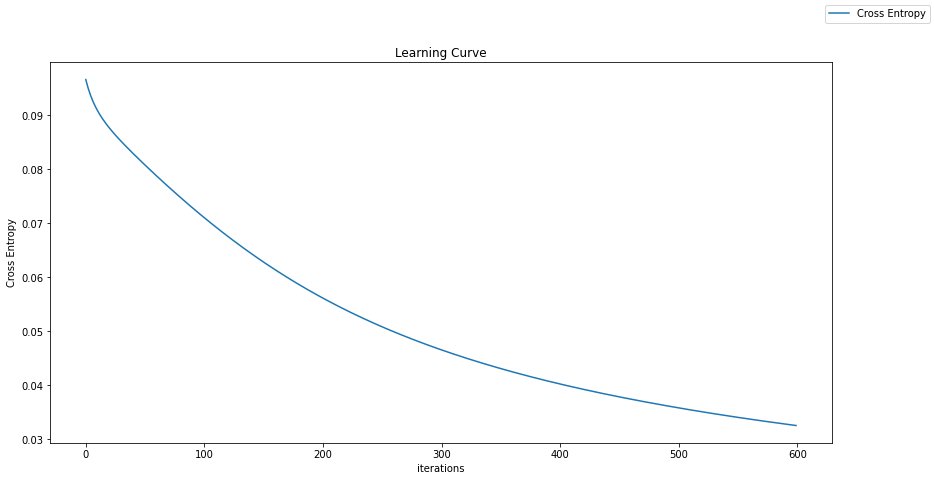

In [10]:
network.gradientdescent(alpha, iterations, pcs, y)

#### Validation
To validate the training set we simply instantiate the class "NetworkValidation" from the module "optimizer" and pass our trained thetas and trained bias as input parameters as well as the activation function we used during training.

In [11]:
validator = optimizer.NetworkValidation(network.thetasarray, network.biasarray, "sigmoid")

As the data preparation of the validation set and the data preparation of the training set must be equal, we scale the validation data with the scaler ("my_scaler") which we initialized for the training set.

In [12]:
x_validation_scaled = my_scaler.transform(images_validation)

To factorize the validation features in the same way as we did with the training features we now pass the calculated vectors from the training set as input parameters into the pcavalidation method

In [13]:
pcs_validation = pca.pcavalidation(x_validation_scaled, vectors)

"pcavalidation" returns the calculated softmax which then can be further processed to get the f1 scores for each class of the validation data

In [14]:
softmax = validator.prediction(pcs_validation)

In [15]:
h = np.argmax(softmax, axis=1)

In [16]:
y = labels_validation

In [17]:
yoh = network.onehot(y, network.outputneurons)

In [18]:
yoh_pred = network.onehot(h, network.outputneurons)

In [19]:
network.f1_scores_classes(MNIST_DICTIONARY, yoh, yoh_pred)

The mean F1 Score is: 0.7953623924240664
F1 Score for  0  :  0.9007936507936508
____________
F1 Score for  1  :  0.9278617710583152
____________
F1 Score for  2  :  0.7653688524590164
____________
F1 Score for  3  :  0.784556720686368
____________
F1 Score for  4  :  0.7650602409638554
____________
F1 Score for  5  :  0.6589805825242719
____________
F1 Score for  6  :  0.8546571136131014
____________
F1 Score for  7  :  0.826959847036329
____________
F1 Score for  8  :  0.7463157894736843
____________
F1 Score for  9  :  0.723069355632071
____________


array([0.9008, 0.9279, 0.7654, 0.7846, 0.7651, 0.659 , 0.8547, 0.827 ,
       0.7463, 0.7231])